<a href="https://colab.research.google.com/github/STASYA00/IAAC2024_tutorials/blob/main/quickstarts/02_osm_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> - Stasja's notebook

In [ ]:
!pip install osmnx geopy scikit-learn

In [ ]:
import geopandas
import matplotlib.pyplot as plt
import osmnx
import seaborn as sns
from shapely.geometry import Point, LineString

sns.set_style(style="dark")

### 🕸 Street network

In [ ]:
PLACE_NAME = "el Clot, Barcelona, Spain"
graph = osmnx.graph_from_place(PLACE_NAME)

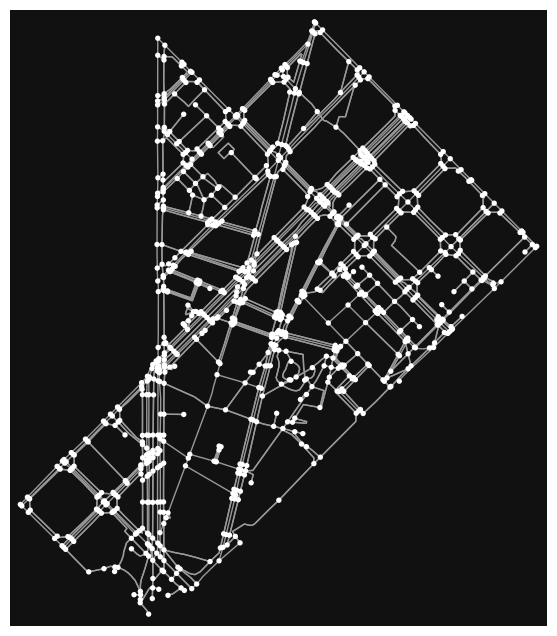

In [ ]:
# showing our street network

figure, ax = osmnx.plot_graph(graph)

### 🕍 Building footprints

We can retrieve places information as well (buildings, parks, amenities etc). The data that we retrieve is a dataframe, like the ones we worked with during the previous term:

In [ ]:
buildings = osmnx.geometries_from_place(
    PLACE_NAME,
    {"building": True},
)

buildings.head()

<ipython-input-5-25295188f309>:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  buildings = osmnx.geometries_from_place(
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_sp

addr:housenumber addr:postcode  \
element_type osmid                                      
way          93219899               835         08018   
             146984774              2-3         08026   
             185460923              234         08027   
             185462389              NaN           NaN   
             185462392              NaN           NaN   

                                            addr:street  \
element_type osmid                                        
way          93219899   Gran Via de les Corts Catalanes   
             146984774           Plaça del Canonge Rodó   
             185460923    Carrer de Las Navas de Tolosa   
             185462389                              NaN   
             185462392                              NaN   

                                                                 geometry  \
element_type osmid                                                          
way          93219899   POLYGON ((2.18821 41.40530, 2.18828 41.40526, ...   
             146984774  POLYGON ((2.18752 41.40990, 2.18758 41.40988, ...   
             185460923  POLYGON ((2.18963 41.41338, 2.18966 41.41341, ...   
             185462389  POLYGON ((2.19052 41.41443, 2.19064 41.41471, ...   
             185462392  POLYGON ((2.18974 41.41293, 2.18976 41.41294, ...   

                        addr:city           amenity  \
element_type osmid                                    
way          93219899   Barcelona               NaN   
             146984774  Barcelona  place_of_worship   
             185460923        NaN               NaN   
             185462389        NaN               NaN   
             185462392        NaN               NaN   

                                                        name  \
element_type osmid                                             
way          93219899   Centre cultural La Farinera del Clot   
             146984774                   Sant Martí del Clot   
             185460923                                   NaN   
             185462389                                   NaN   
             185462392                                   NaN   

                                                     name:ca access  \
element_type osmid                                                    
way          93219899   Centre cultural La Farinera del Clot    NaN   
             146984774                   Sant Martí del Clot    NaN   
             185460923                                   NaN    NaN   
             185462389                                   NaN    NaN   
             185462392                                   NaN    NaN   

                         wikidata  ...  fee image start_date website:en  \
element_type osmid                 ...                                    
way          93219899   Q19256811  ...  NaN   NaN        NaN        NaN   
             146984774  Q98756038  ...  NaN   NaN        NaN        NaN   
             185460923        NaN  ...  NaN   NaN        NaN        NaN   
             185462389        NaN  ...  NaN   NaN        NaN        NaN   
             185462392        NaN  ...  NaN   NaN        NaN        NaN   

                       website:es ways type addr:housenumber2  \
element_type osmid                                              
way          93219899         NaN  NaN  NaN               NaN   
             146984774        NaN  NaN  NaN               NaN   
             185460923        NaN  NaN  NaN               NaN   
             185462389        NaN  NaN  NaN               NaN   
             185462392        NaN  NaN  NaN               NaN   

                       addr:postcode:source addr:street:sym_ul  
element_type osmid                                              
way          93219899                   NaN                NaN  
             146984774                  NaN                NaN  
             185460923                  NaN                NaN  
             185462389       

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

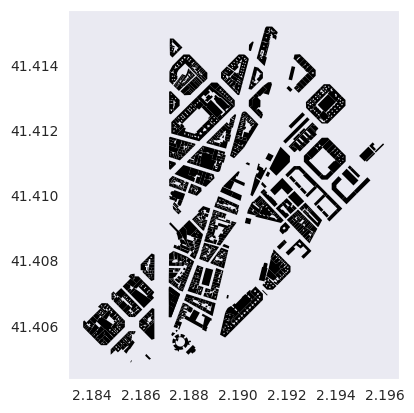

In [ ]:
buildings.plot(color="black", edgecolor="none")

### 🍽 Other data extraction

There is a lot more data that can be extracted, like parks, amenities and more! See the entire list [here](https://wiki.openstreetmap.org/wiki/Map_features).

In [ ]:
restaurants = osmnx.geometries_from_place(
    PLACE_NAME,
    {
        "amenity": "restaurant"
    }
)
restaurants.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-7-995886824f10>:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  restaurants = osmnx.geometries_from_place(


addr:housenumber                   addr:street  \
element_type osmid                                                       
node         3009041122              282                  Lope de Vega   
             3009083162              NaN  Carrer del Concili de Trento   
             3009091336               48  Carrer del Concili de Trento   
             3049368345               78               Carrer del Clot   
             3049371937               49               Carrer del Clot   

                            amenity  \
element_type osmid                    
node         3009041122  restaurant   
             3009083162  restaurant   
             3009091336  restaurant   
             3049368345  restaurant   
             3049371937  restaurant   

                                                         contact:facebook  \
element_type osmid                                                          
node         3009041122  https://www.facebook.com/Frankfurt.Elracodelamel   
             3009083162                                               NaN   
             3009091336                                               NaN   
             3049368345                                               NaN   
             3049371937                                               NaN   

                                                    name  \
element_type osmid                                         
node         3009041122      Frankfurt El Racó de la Mel   
             3009083162                  Golf Restaurant   
             3009091336  Bar Restaurant Virona4 Pizzeria   
             3049368345                   A ruta gallega   
             3049371937                      La Clotenca   

                                         geometry       cuisine  \
element_type osmid                                                
node         3009041122  POINT (2.19359 41.41222)           NaN   
             3009083162  POINT (2.19331 41.41164)           NaN   
             3009091336  POINT (2.19317 41.41155)  indian;pizza   
             3049368345  POINT (2.18852 41.40832)           NaN   
             3049371937  POINT (2.18806 41.40772)         pizza   

                                           website  addr:city internet_access  \
element_type osmid                                                              
node         3009041122                        NaN        NaN             NaN   
             3009083162                        NaN        NaN             NaN   
             3009091336  http://virona4pizzeria.es        NaN             NaN   
             3049368345                        NaN  Barcelona             NaN   
             3049371937                        NaN  Barcelona            wlan   

                         ... payment:coins payment:visa payment:visa_debit  \
element_type osmid       ...                                                 
node         3009041122  ...           NaN          NaN                NaN   
             3009083162  ...           NaN          NaN                NaN   
             3009091336  ...           NaN          NaN                NaN   
             3049368345  ...           NaN          NaN                NaN   
             3049371937  ...           NaN          NaN                NaN   

                        contact:phone description payment:discover_card  \
element_type osmid                                                        
node         3009041122           NaN         NaN                   NaN   
             3009083162           NaN         NaN                   NaN   
             3009091336           NaN         NaN                   NaN   
             3049368345           NaN         NaN                   NaN   
             3049371937           NaN         NaN                   NaN   

                        payment:mastercard nodes building:levels building:part  
element_type osmid                                                            

In [ ]:
bench = osmnx.geometries_from_place(
    PLACE_NAME,
    {
        "amenity": "bench"
    }
)
bench.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-8-bddde04bf066>:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  bench = osmnx.geometries_from_place(


amenity backrest colour material seats  \
element_type osmid                                               
node         3144669430   bench      yes  brown     wood    12   
             4637901075   bench      yes    NaN      NaN   NaN   
             6049759868   bench      yes    NaN      NaN   NaN   
             6049761083   bench      yes    NaN      NaN   NaN   
             6049761084   bench      yes    NaN      NaN   NaN   

                                         geometry  
element_type osmid                                 
node         3144669430  POINT (2.19117 41.41527)  
             4637901075  POINT (2.19093 41.41023)  
             6049759868  POINT (2.18827 41.40786)  
             6049761083  POINT (2.18835 41.40801)  
             6049761084  POINT (2.18824 41.40793)

In [ ]:
trees = osmnx.geometries_from_place(
    PLACE_NAME,
    {
        "natural": "tree"
    }
)
trees.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-9-4eb0eaa40d5a>:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  trees = osmnx.geometries_from_place(


leaf_type natural source species:es  \
element_type osmid                                               
node         3226658024  broadleaved    tree   Bing    Palmera   
             3226658033  broadleaved    tree   Bing    Palmera   
             3226658043  broadleaved    tree   Bing    Palmera   
             4273043066          NaN    tree    NaN        NaN   
             4273043067          NaN    tree    NaN        NaN   

                                         geometry leaf_cycle loc_name species  
element_type osmid                                                             
node         3226658024  POINT (2.19513 41.41206)        NaN      NaN     NaN  
             3226658033  POINT (2.19439 41.41213)        NaN      NaN     NaN  
             3226658043  POINT (2.19473 41.41231)        NaN      NaN     NaN  
             4273043066  POINT (2.18957 41.40672)        NaN      NaN     NaN  
             4273043067  POINT (2.18968 41.40676)        NaN      NaN     NaN

In [ ]:
cycle = osmnx.geometries_from_place(
    PLACE_NAME,
    {
        "highway": "cycleway"
    }
)
cycle.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-10-2d5dff29665e>:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  cycle = osmnx.geometries_from_place(


highway  \
element_type osmid                 
way          273832046  cycleway   
             289065060  cycleway   
             289066420  cycleway   
             313996125  cycleway   
             439868947  cycleway   

                                                                 geometry  \
element_type osmid                                                          
way          273832046  LINESTRING (2.19236 41.41290, 2.19222 41.41280...   
             289065060  LINESTRING (2.18465 41.40535, 2.18448 41.40522...   
             289066420  LINESTRING (2.18699 41.40713, 2.18686 41.40704...   
             313996125  LINESTRING (2.18699 41.40527, 2.18699 41.40547...   
             439868947  LINESTRING (2.18710 41.41400, 2.18699 41.41397...   

                                                                    nodes  \
element_type osmid                                                          
way          273832046  [2786421972, 8148407984, 4826156014, 482615601...   
             289065060  [2926155861, 3053404690, 8144122299, 829517652...   
             289066420  [2926160824, 6416619433, 3053404693, 637814235...   
             313996125  [3200354838, 3200354839, 7997495487, 485066102...   
             439868947               [5927245625, 2293731606, 9605286627]   

                       cycle_network cycleway:surface footway:surface lanes  \
element_type osmid                                                            
way          273832046        ES:BCN          asphalt   paving_stones     1   
             289065060           NaN          asphalt   paving_stones     2   
             289066420           NaN          asphalt   paving_stones     2   
             313996125        ES:BCN              NaN             NaN     1   
             439868947        ES:BCN              NaN             NaN     2   

                        lit                        name  \
element_type osmid                                        
way          273832046  yes              Carrer d'Aragó   
             289065060  yes  Carrer del Consell de Cent   
             289066420  yes  Carrer del Consell de Cent   
             313996125  yes          Avinguda Meridiana   
             439868947  NaN          Avinguda Meridiana   

                                           name:ca  ... width est_width  \
element_type osmid                                  ...                   
way          273832046              Carrer d'Aragó  ...   1.5       NaN   
             289065060  Carrer del Consell de Cent  ...   1.5       2.5   
             289066420  Carrer del Consell de Cent  ...   1.5       2.5   
             313996125          Avinguda Meridiana  ...   2.5       NaN   
             439868947          Avinguda Meridiana  ...   2.5       NaN   

                       motor_vehicle             name:es foot  \
element_type osmid                                              
way          273832046           NaN                 NaN  NaN   
             289065060           NaN                 NaN  NaN   
             289066420           NaN                 NaN  NaN   
             313996125            no  Avinguda Meridiana  NaN   
             439868947           NaN                 NaN  NaN   

                       bicycle:lanes:backward bicycle:lanes:forward cycleway  \
element_type osmid                                                             
way          273832046                    NaN                   NaN      NaN   
             289065060                    NaN                   NaN      NaN   
             289066420                    NaN                   NaN      NaN   
             313996125                    NaN                   NaN      NaN   
             439868947                    NaN                   NaN      NaN   

                       lanes:backward lanes:forward  
element_type osmid                                   
way          273832046            NaN           NaN  
             289065

In [ ]:
playground = osmnx.geometries_from_place(
    PLACE_NAME,
    {
        "leisure": "playground"
    }
)
playground.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-11-2829e75f4cba>:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  playground = osmnx.geometries_from_place(


access     leisure                  geometry barrier  \
element_type osmid                                                             
node         3027824135    yes  playground  POINT (2.19498 41.40988)     NaN   
             4275716071    NaN  playground  POINT (2.19025 41.41062)     NaN   
             4306388337    NaN  playground  POINT (2.19124 41.41268)     NaN   
             5790179453    NaN  playground  POINT (2.18841 41.41217)     NaN   
             5790181653    yes  playground  POINT (2.19217 41.40867)     NaN   

                        toilets:wheelchair wheelchair nodes  
element_type osmid                                           
node         3027824135                NaN        NaN   NaN  
             4275716071                NaN        NaN   NaN  
             4306388337                NaN        NaN   NaN  
             5790179453                 no        yes   NaN  
             5790181653                NaN        NaN   NaN

### 🎢 Putting it all together in one map

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


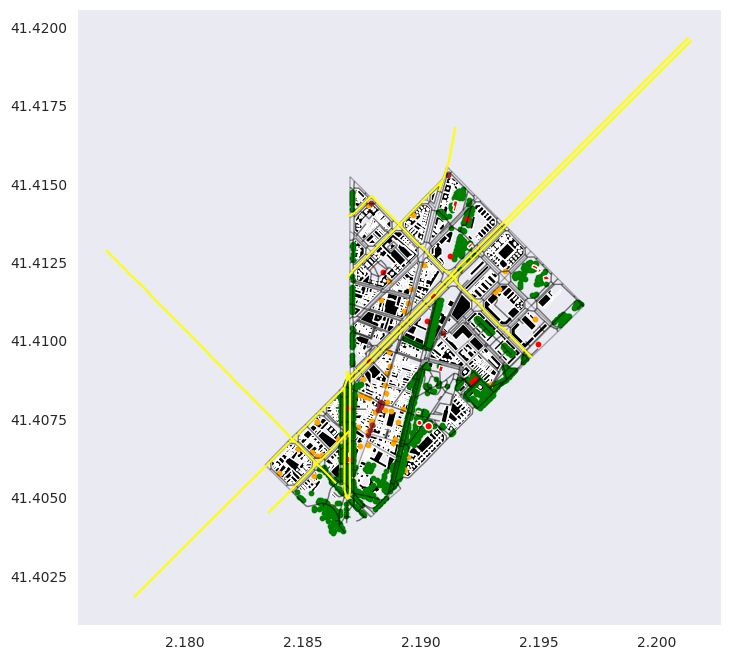

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")



# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
restaurants.plot(ax=ax, color="orange", markersize=10)

#Plot bench
bench.plot(ax=ax, color="brown", markersize=10)

#Plot trees
trees.plot(ax=ax, color="green", markersize=10)

#Plot cyclepath
cycle.plot(ax=ax, color="yellow", markersize=10)

#Plot playground
playground.plot(ax=ax, color="red", markersize=10)

plt.show()

### 📍Mapping our own place

There are several ways to map our place on the map:

1. placing a point when we know the exact coordinates
2. finding place's coordinates via [geocoding](https://nominatim.org/)

#### 📍Placing a point by its coordinates

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


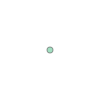

In [ ]:
coords = (2.19566, 41.41114)
p = Point(coords)
p

In [ ]:
print(p.x, p.y)

2.19566 41.41114


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
geom = geopandas.GeoDataFrame(
    {
        "geometry": [p],
    },
    crs=edges.crs
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


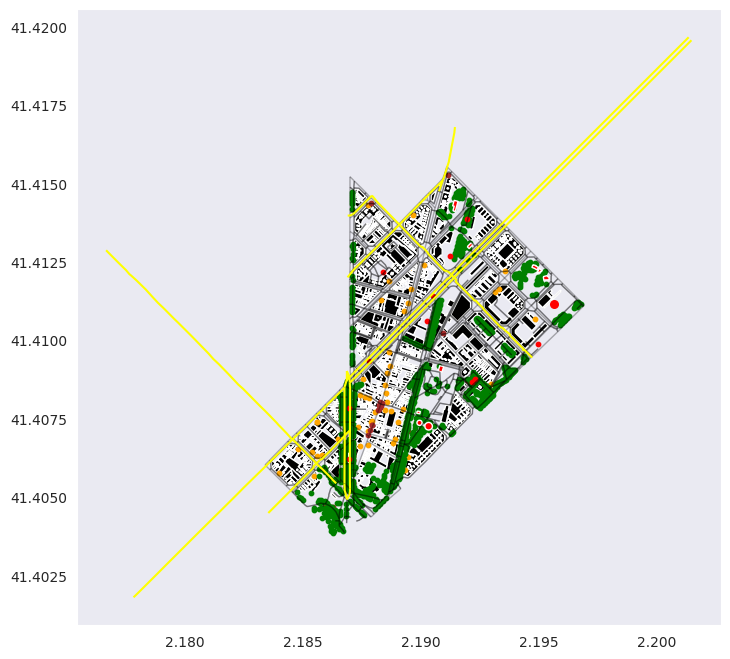

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")



# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
restaurants.plot(ax=ax, color="orange", markersize=10)

#Plot bench
bench.plot(ax=ax, color="brown", markersize=10)

#Plot trees
trees.plot(ax=ax, color="green", markersize=10)

#Plot cyclepath
cycle.plot(ax=ax, color="yellow", markersize=10)

#Plot playground
playground.plot(ax=ax, color="red", markersize=10)


# Plot 2.19566 41.41114
geom.plot(ax=ax, facecolor="red", markersize=30)


plt.show()

#### ㊙️ Geocoding: name to coordinates

In [ ]:
our_place = "Complex Esportiu Municipal Clot de la Mel (CEM)"  # "Complex Esportiu Municipal Clot de la Mel (CEM)"
geocoded_addresses = geopandas.tools.geocode(
    [our_place],
    provider="nominatim",
    user_agent="autogis2023",
    timeout=10
)
geocoded_addresses.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bo

,geometry,address
0,POINT (2.19566 41.41114),Complex Esportiu Municipal Clot de la Mel (CEM...


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


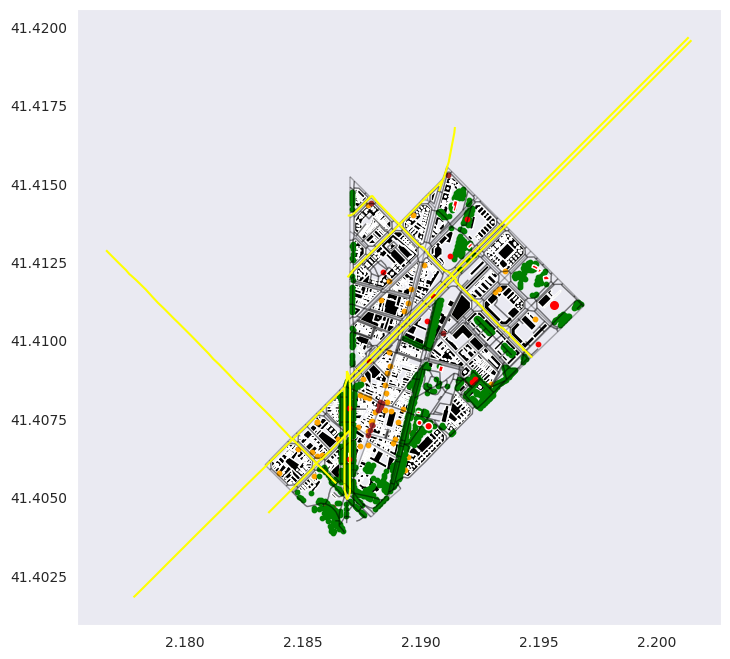

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")


# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
restaurants.plot(ax=ax, color="orange", markersize=10)

#Plot bench
bench.plot(ax=ax, color="brown", markersize=10)

#Plot trees
trees.plot(ax=ax, color="green", markersize=10)

#Plot cyclepath
cycle.plot(ax=ax, color="yellow", markersize=10)

#Plot playground
playground.plot(ax=ax, color="red", markersize=10)


# Plot 2.19566 41.41114
geocoded_addresses.plot(ax=ax, color="red", markersize=30)


plt.show()

### 📐 Geometrical operations

A list of possible geometrical operations can be found in [shapely documentation](https://shapely.readthedocs.io/en/stable/geometry.html).

Let's check how many restaurants lie within 4 minutes fast walk (0.5 km). 1km is around 0.008 degrees

In [ ]:
rad = p.buffer(0.008 * 0.5)  # making offset of 1.5 km from our point of interest

rad = geopandas.GeoDataFrame(
    {
        "geometry": [rad],
    },
    crs=buildings.crs
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


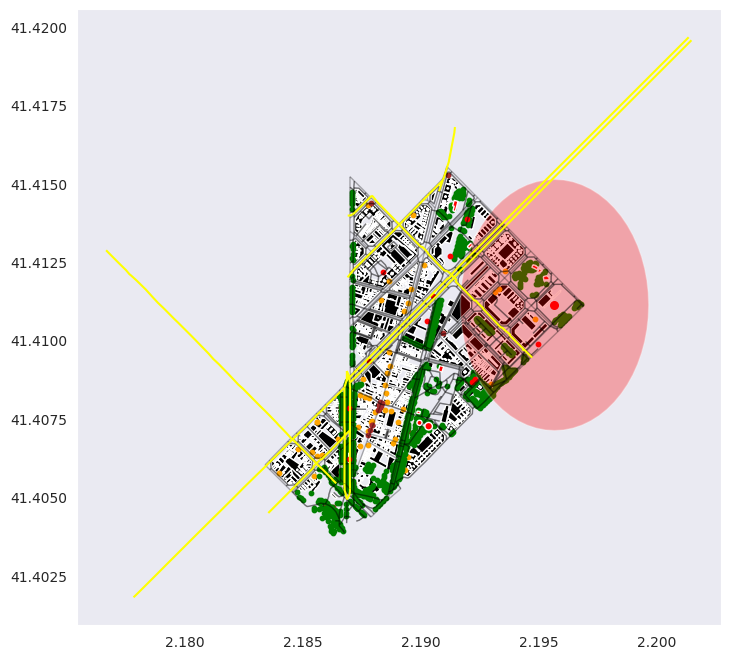

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")

# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
restaurants.plot(ax=ax, color="orange", markersize=10)

#Plot bench
bench.plot(ax=ax, color="brown", markersize=10)

#Plot trees
trees.plot(ax=ax, color="green", markersize=10)

#Plot cyclepath
cycle.plot(ax=ax, color="yellow", markersize=10)

#Plot playground
playground.plot(ax=ax, color="red", markersize=10)

# Plot IAAC
geocoded_addresses.plot(ax=ax, facecolor="red", markersize=30)
rad.plot(ax=ax, linewidth=1, facecolor="red", alpha=0.3)

plt.show()

In [ ]:
accessible_playground = [r for r in playground["geometry"] if isinstance(r, Point) and r.within(rad["geometry"][0])]
accessible_playground = rad = geopandas.GeoDataFrame(
    {
        "geometry": accessible_playground,
    },
    crs=buildings.crs
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


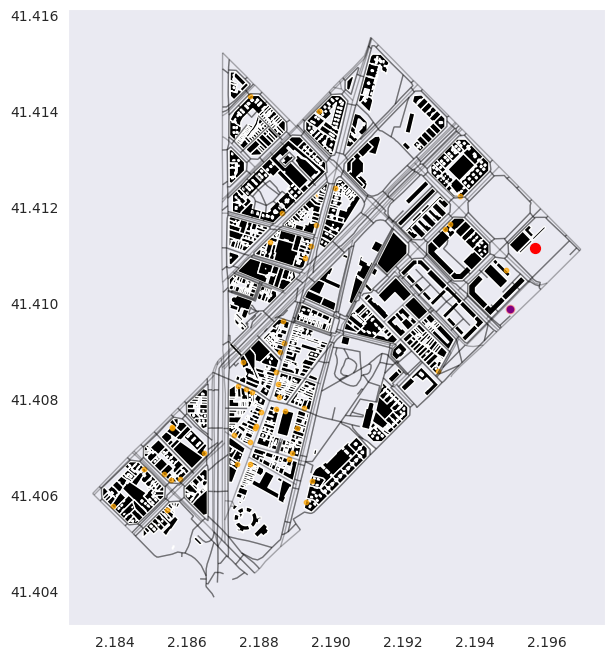

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")

# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
restaurants.plot(ax=ax, color="orange", markersize=10, alpha=0.7)

# Plot IAAC
geocoded_addresses.plot(ax=ax, facecolor="red", markersize=50)
rad.plot(ax=ax, linewidth=1, facecolor="red", alpha=0.3)

accessible_playground.plot(ax=ax, facecolor="purple", markersize=20, alpha=1.0)

plt.show()

### 🕸 Network Analysis

With osmnx we can get statistics necessary for urban analysis within a defined area. Let's define our area as a polygon:

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


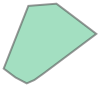

In [ ]:
zone = edges.unary_union.convex_hull
zone

In [ ]:
stats = osmnx.basic_stats(graph, area=zone.area)
stats

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'n': 955,
 'm': 2625,
 'k_avg': 5.49738219895288,
 'edge_length_total': 74881.91900000024,
 'edge_length_avg': 28.526445333333424,
 'streets_per_node_avg': 3.3769633507853403,
 'streets_per_node_counts': {0: 0, 1: 42, 2: 1, 3: 477, 4: 428, 5: 4, 6: 3},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.04397905759162304,
  2: 0.0010471204188481676,
  3: 0.49947643979057593,
  4: 0.4481675392670157,
  5: 0.004188481675392671,
  6: 0.0031413612565445027},
 'intersection_count': 913,
 'street_length_total': 45882.326,
 'street_segment_count': 1563,
 'street_length_avg': 29.355294945617402,
 'circuity_avg': 1.0200181637951844,
 'self_loop_proportion': 0.0012795905310300703,
 'node_density_km': 10806992928831.547,
 'intersection_density_km': 10331711564422.201,
 'edge_density_km': 847380491235957.4,
 'street_density_km': 519214631037009.25}

What do these stats mean?

[Link](https://osmnx.readthedocs.io/en/stable/user-reference.html#module-osmnx.stats)

#### 〽️ Shortest route

In [ ]:
origin = (
    osmnx.geocode_to_gdf("Complex Esportiu Municipal Clot de la Mel (CEM)")  # fetch geolocation
    .to_crs(edges.crs)  # transform to UTM
    .at[0, "geometry"]  # pick geometry of first row
    .centroid  # use the centre point
)

destination = (
    osmnx.geocode_to_gdf("Institut Salvador Espriu")
    .to_crs(edges.crs)
    .at[0, "geometry"]
    .centroid
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


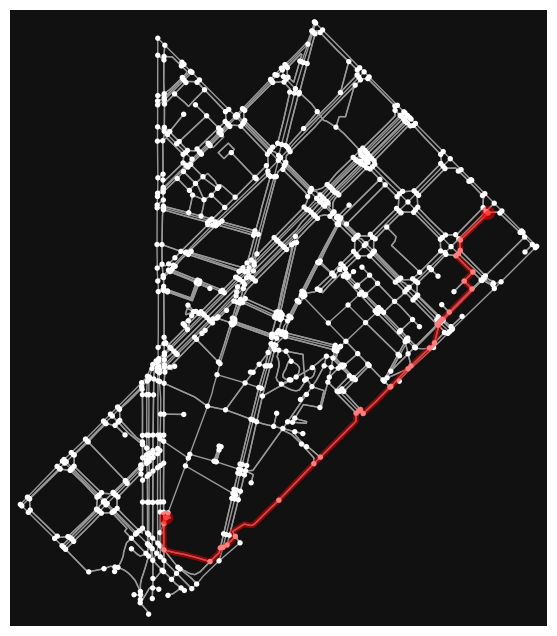

In [ ]:
origin_node_id = osmnx.nearest_nodes(graph, origin.x, origin.y)
destination_node_id = osmnx.nearest_nodes(graph, destination.x, destination.y)

# calculating the shortest path:
route = osmnx.shortest_path(graph, origin_node_id, destination_node_id)

# plotting the projection
fig, ax = osmnx.plot_graph_route(graph, route)

In [ ]:
route_nodes = nodes.loc[route]
route_line = LineString(
    list(route_nodes.geometry.values)
)
route_geom = geopandas.GeoDataFrame(
    {
        "geometry": [route_line],
        "osm_nodes": [route],
    },
    crs=edges.crs
)

# Calculate the route length
route_geom.length

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-27-3f1016416ab9>:14: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  route_geom.length


0    0.013189
dtype: float64

### 🕸 Walkability analysis

How far can you reach from a place on foot?

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


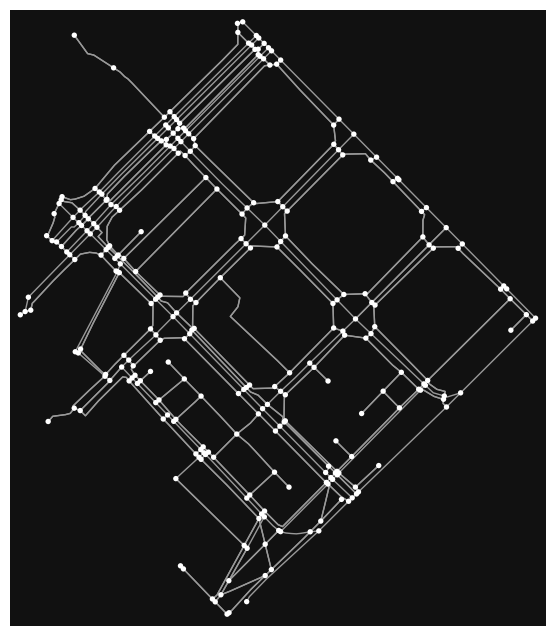

In [ ]:
# getting iaac node from the graph:
iaac_node = osmnx.distance.nearest_nodes(graph, p.x, p.y, return_dist=False)

# cutting the graph to hold 1km distance from the node only:
g = osmnx.truncate.truncate_graph_dist(graph, iaac_node, max_dist=500)
figure, ax = osmnx.plot_graph(g)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


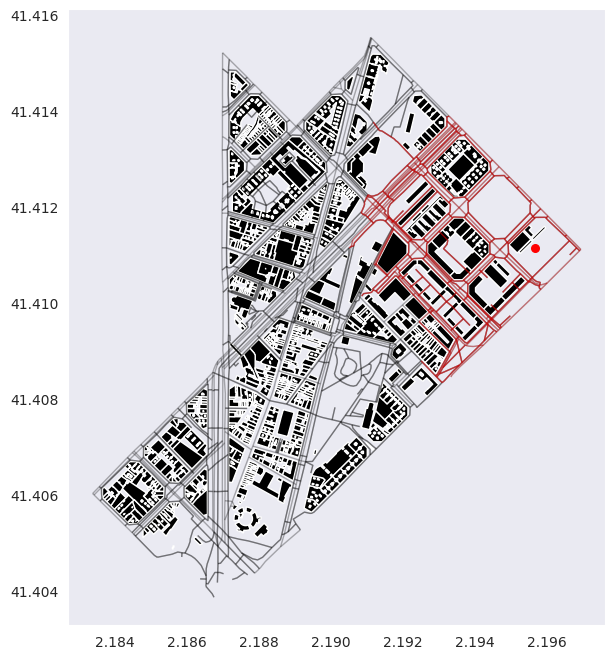

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")
geom.plot(ax=ax, facecolor="red", markersize=30)


# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

nodes1, edges1 = osmnx.graph_to_gdfs(g)
edges1.plot(ax=ax, linewidth=1, edgecolor="red", alpha=0.3)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


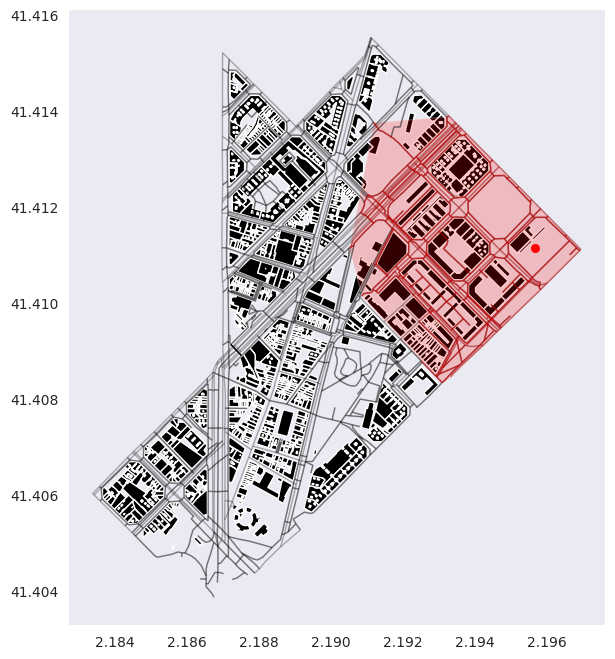

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")
geom.plot(ax=ax, facecolor="red", markersize=30)


# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

nodes1, edges1 = osmnx.graph_to_gdfs(g)
edges1.plot(ax=ax, linewidth=1, edgecolor="red", alpha=0.3)

walkable_zone = edges1.unary_union.convex_hull

w_zone_mapped = geopandas.GeoDataFrame(
    {
        "geometry": [walkable_zone],
    },
    crs=buildings.crs
)

w_zone_mapped.plot(ax=ax, facecolor="red", alpha=0.2)


plt.show()

### 🧬 Resources

* [Downloading data for entire countries / continents](https://download.geofabrik.de/)
* [Automating GIS processes course 2023](https://autogis-site.readthedocs.io/en/latest/course-info/general-information.html)
* [OSMNX](https://osmnx.readthedocs.io/en/stable/user-reference.html)
* [shapely](https://shapely.readthedocs.io/en/stable/geometry.html)

This notebook is based on the material from [Automating GIS processes course 2023](https://autogis-site.readthedocs.io/en/latest/course-info/general-information.html) from [University of Helsinki](https://www.helsinki.fi/sv) by Henrikki Tenkanen, Vuokko Heikinheimo and Håvard Wallin Aagesen.

Materials taken from the course belong mostly to the [Lesson 3 Geocoding](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-3/geocoding.html) and [Lesson 6 Retrieving data from OSM and Network Analysis](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-6/overview.html). Material was adapted for the purposes of this course by changing the location in the example as well as adding calculation of walking distance from a given point.


Thanks to them for maintaining [the course repo](https://github.com/Automating-GIS-processes/site/) and improving the material from year to year.